In [2]:
import pandas as pd
import numpy as np

【例5-1】使用read_csv函数读取CSV文件。

In [3]:
df1 = pd.read_csv("data//sunspots.csv")
 #读取CSV文件到DataFrame中
print(df1.sample(5))

df2 = pd.read_table("data//sunspots.csv",sep = ",")
 #使用read_table，并指定分隔符
print("------------------")
print(df2.sample(5))
df3 = pd.read_csv("data//sunspots.csv",names = ["a","b"])
 #文件不包含表头行，允许自动分配默认列名，也可以指定列名
print("------------------")
print(df3.sample(5))

     year  counts
62   1762    61.2
103  1803    43.1
88   1788   130.9
250  1950    83.9
225  1925    44.3
------------------
     year  counts
83   1783    22.8
218  1918    80.6
285  1985    17.9
121  1821     6.6
101  1801    34.0
------------------
        a     b
114  1813  12.2
40   1739   101
119  1818  30.1
96   1795  21.3
129  1828  64.2


【例5-2】读取excel文件。

In [4]:
xlsx = "data//data_test.xls"
df1 = pd.read_excel(xlsx,"Sheet1")
print(df1)
#也可以直接利用： 
df2 =  pd.read_excel("data//data_test.xls","Sheet1")
print("-------------------------------")
print(df2)

   00101  长裤  黑色   89
0   1123  上衣  红色  129
1   1010  鞋子  蓝色  150
2    100  内衣  灰色  100
-------------------------------
   00101  长裤  黑色   89
0   1123  上衣  红色  129
1   1010  鞋子  蓝色  150
2    100  内衣  灰色  100


【例5-3】merge的默认合并数据。

In [5]:
price = pd.DataFrame({'fruit':['apple','grape','orange','orange'],
'price':[8,7,9,11]})
amount = pd.DataFrame({'fruit':['apple','grape','orange'],'amout':[5,11,8]})
display(price,amount,pd.merge(price,amount))


,fruit,price
0,apple,8
1,grape,7
2,orange,9
3,orange,11


,fruit,amout
0,apple,5
1,grape,11
2,orange,8


,fruit,price,amout
0,apple,8,5
1,grape,7,11
2,orange,9,8
3,orange,11,8


【例5-4】指定合并时的列名。

In [6]:
display(pd.merge(price,amount,left_on = 'fruit',right_on = 'fruit'))

,fruit,price,amout
0,apple,8,5
1,grape,7,11
2,orange,9,8
3,orange,11,8


【例5-5】左连接。

In [7]:
display(pd.merge(price,amount,how = 'left'))

,fruit,price,amout
0,apple,8,5
1,grape,7,11
2,orange,9,8
3,orange,11,8


【例5-6】右连接。

In [8]:
display(pd.merge(price,amount,how = 'right'))

,fruit,price,amout
0,apple,8,5
1,grape,7,11
2,orange,9,8
3,orange,11,8


【例5-7】merge通过多个键合并。

In [9]:
left = pd.DataFrame({'key1':['one','one','two'],'key2':['a','b','a'],'value1':range(3)})
right = pd.DataFrame({'key1':['one','one','two','two'],'key2':['a','a','a','b'],'value2':range(4)})
display(left,right,pd.merge(left,right,on = ['key1','key2'],how = 'left'))


,key1,key2,value1
0,one,a,0
1,one,b,1
2,two,a,2


,key1,key2,value2
0,one,a,0
1,one,a,1
2,two,a,2
3,two,b,3


,key1,key2,value1,value2
0,one,a,0,0.0
1,one,a,0,1.0
2,one,b,1,NaN
3,two,a,2,2.0


【例5-8】merge函数中参数suffixes的应用。

In [10]:
print(pd.merge(left,right,on = 'key1'))
print(pd.merge(left,right,on = 'key1',suffixes = ('_left','_right')))


  key1 key2_x  value1 key2_y  value2
0  one      a       0      a       0
1  one      a       0      a       1
2  one      b       1      a       0
3  one      b       1      a       1
4  two      a       2      a       2
5  two      a       2      b       3
  key1 key2_left  value1 key2_right  value2
0  one         a       0          a       0
1  one         a       0          a       1
2  one         b       1          a       0
3  one         b       1          a       1
4  two         a       2          a       2
5  two         a       2          b       3


【例5-9】两个Series的数据连接。

In [11]:
s1 = pd.Series([0,1],index = ['a','b'])
s2 = pd.Series([2,3,4],index = ['a','d','e'])
s3 = pd.Series([5,6],index = ['f','g'])
print(pd.concat([s1,s2,s3]))  #Series行合并


a    0
b    1
a    2
d    3
e    4
f    5
g    6
dtype: int64


【例5-10】两个DataFrame的数据连接。

In [12]:
data1 = pd.DataFrame(np.arange(6).reshape(2,3),columns = list('abc'))
data2 = pd.DataFrame(np.arange(20,26).reshape(2,3),columns = list('ayz'))
data = pd.concat([data1,data2],axis = 0,sort=False)
display(data1,data2,data)

,a,b,c
0,0,1,2
1,3,4,5


,a,y,z
0,20,21,22
1,23,24,25


,a,b,c,y,z
0,0,1.0,2.0,NaN,NaN
1,3,4.0,5.0,NaN,NaN
0,20,NaN,NaN,21.0,22.0
1,23,NaN,NaN,24.0,25.0


【例5-11】指定索引顺序。

In [13]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: 'Iterable[NDFrame] | Mapping[HashableT, NDFrame]', *, axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool | None' = None) -> 'DataFrame | Series'
    Concatenate pandas objects along a particular axis.
    
    Allows optional set logic along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which c

In [14]:
s1 = pd.Series([0,1],index = ['a','b'])
s2 = pd.Series([2,3,4],index = ['a','d','e'])
s3 = pd.Series([5,6],index = ['f','g'])
s4 = pd.concat([s1*5,s3],sort=False)
s5 = pd.concat([s1,s4],axis = 1,sort=False)
s6 = pd.concat([s1,s4],axis = 1,join = 'inner',sort=False)
s7 = pd.concat([s1,s4],axis = 1,join = 'inner',keys= ['b','a'],sort=False)
display(s4,s5,s6,s7)

a    0
b    5
f    5
g    6
dtype: int64

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


,0,1
a,0,0
b,1,5


,b,a
a,0,0
b,1,5


【例5-12】使用combine_first合并。

In [15]:
s6.combine_first(s5)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


【例5-13】利用isnull检测缺失值。

In [16]:
import numpy as np
import pandas as pd
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
print(string_data)
string_data.isnull()


0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object


0    False
1    False
2     True
3    False
dtype: bool

【例5-14】None值也会被当做NA处理。

In [17]:
string_data = pd.Series(['aardvark', 'artichoke',None, 'avocado'])
string_data.isnull()


0    False
1    False
2     True
3    False
dtype: bool

【例5-15】利用isnull().sum()统计缺失值。

In [18]:
df = pd.DataFrame(np.arange(12).reshape(3,4),columns = ['A','B','C','D'])
df.iloc[2,:] = np.nan
df[3] = np.nan
print(df)
df.isnull().sum()


     A    B    C    D   3
0  0.0  1.0  2.0  3.0 NaN
1  4.0  5.0  6.0  7.0 NaN
2  NaN  NaN  NaN  NaN NaN


A    1
B    1
C    1
D    1
3    3
dtype: int64

【例5-16】用info方法查看DataFrame的缺失值。

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2 non-null      float64
 1   B       2 non-null      float64
 2   C       2 non-null      float64
 3   D       2 non-null      float64
 4   3       0 non-null      float64
dtypes: float64(5)
memory usage: 248.0 bytes


【例5-17】Series的dropna用法。

In [20]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
print(data)
print(data.dropna())


0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64
0    1.0
2    3.5
4    7.0
dtype: float64


【例5-18】布尔型索引选择过滤非缺失值。

In [21]:
not_null = data.notnull()
print(not_null)
print(data[not_null])


0     True
1    False
2     True
3    False
4     True
dtype: bool
0    1.0
2    3.5
4    7.0
dtype: float64


【例5-19】DataFrame对象的dropna默认参数使用。

In [22]:
from numpy import nan as NA
data = pd.DataFrame([[1., 5.5, 3.], [1., NA, NA],[NA, NA, NA], 
[NA, 5.5, 3.]])
print(data)
cleaned = data.dropna()
print('删除缺失值后的：\n',cleaned)


     0    1    2
0  1.0  5.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  5.5  3.0
删除缺失值后的：
      0    1    2
0  1.0  5.5  3.0


【例5-20】传入参数all。

In [23]:
data = pd.DataFrame([[1., 5.5, 3.], [1., NA, NA],[NA, NA, NA], 
[NA, 5.5, 3.]])
print(data)
data.dropna(how='all')


     0    1    2
0  1.0  5.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  5.5  3.0


,0,1,2
0,1.0,5.5,3.0
1,1.0,NaN,NaN
3,NaN,5.5,3.0


【例5-21】dropna中的axis参数应用。

In [24]:
df = pd.DataFrame([[1., 5.5, NA], [1., NA, NA],[NA, NA, NA], [NA, 5.5, NA]])
print(df)
df.dropna(axis = 1, how = 'all')


     0    1   2
0  1.0  5.5 NaN
1  1.0  NaN NaN
2  NaN  NaN NaN
3  NaN  5.5 NaN


,0,1
0,1.0,5.5
1,1.0,NaN
2,NaN,NaN
3,NaN,5.5


【例5-22】dropna中的thresh参数应用。

In [25]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
print(df)
df.dropna(thresh=2)


          0         1         2
0 -0.914964       NaN       NaN
1  1.001389       NaN       NaN
2 -0.219410       NaN  0.643107
3  1.058975       NaN  0.848356
4 -0.686243  1.331179  0.094336
5 -1.306332  0.456099  1.596547
6  0.055945 -0.732887 -0.394374


,0,1,2
2,-0.219410,NaN,0.643107
3,1.058975,NaN,0.848356
4,-0.686243,1.331179,0.094336
5,-1.306332,0.456099,1.596547
6,0.055945,-0.732887,-0.394374


【例5-23】通过字典形式填充缺失值。

In [26]:
df = pd.DataFrame(np.random.randn(5,3))
df.loc[:3,1] = NA
df.loc[:2,2] = NA
print(df)
df.fillna({1:0.88,2:0.66})


          0         1         2
0  0.172847       NaN       NaN
1  0.911692       NaN       NaN
2  1.174725       NaN       NaN
3 -0.765732       NaN -0.243435
4 -1.519167 -0.838881 -0.459181


,0,1,2
0,0.172847,0.880000,0.660000
1,0.911692,0.880000,0.660000
2,1.174725,0.880000,0.660000
3,-0.765732,0.880000,-0.243435
4,-1.519167,-0.838881,-0.459181


【例5-24】fillna中method的应用。

In [27]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
print(df)
df.fillna(method = 'ffill')


          0         1         2
0 -0.789912  0.918927 -0.145770
1 -1.217843  0.471634 -0.214655
2  0.552490       NaN  0.100558
3 -1.872238       NaN -0.088768
4  0.623867       NaN       NaN
5  0.541444       NaN       NaN


,0,1,2
0,-0.789912,0.918927,-0.145770
1,-1.217843,0.471634,-0.214655
2,0.552490,0.471634,0.100558
3,-1.872238,0.471634,-0.088768
4,0.623867,0.471634,-0.088768
5,0.541444,0.471634,-0.088768


【例5-25】用Series的均值填充。

In [28]:
series= pd.Series([1., NA, 3.5, NA, 7])
series.fillna(data.mean())


0    1.0
1    5.5
2    3.5
3    NaN
4    7.0
dtype: float64

【例5-26】DataFrame中用均值填充。

In [29]:
df = pd.DataFrame(np.random.randn(4, 3))
df.iloc[2:, 1] = NA
df.iloc[3:, 2] = NA
print(df)
df[1] = df[1].fillna(df[1].mean())
print(df)


          0         1         2
0 -1.165012  0.356350 -0.019708
1 -0.123292 -0.116851  0.338886
2 -1.447733       NaN -0.209689
3 -0.402514       NaN       NaN
          0         1         2
0 -1.165012  0.356350 -0.019708
1 -0.123292 -0.116851  0.338886
2 -1.447733  0.119749 -0.209689
3 -0.402514  0.119749       NaN


【例5-27】判断DataFrame中的重复数据。

In [30]:
data = pd.DataFrame({ 'k1':['one','two'] * 3 + ['two'],'k2':[1, 1, 2, 3, 1, 4, 4] ,'k3':[1,1,5,2,1, 4, 4] })
print(data)
data.duplicated()


    k1  k2  k3
0  one   1   1
1  two   1   1
2  one   2   5
3  two   3   2
4  one   1   1
5  two   4   4
6  two   4   4


0    False
1    False
2    False
3    False
4     True
5    False
6     True
dtype: bool

【例5-28】每行各个字段都相同时去重。

In [31]:
data.drop_duplicates()

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,5
3,two,3,2
5,two,4,4


【例5-29】指定部分列重复时去重。

In [32]:
data.drop_duplicates(['k2','k3'])

,k1,k2,k3
0,one,1,1
2,one,2,5
3,two,3,2
5,two,4,4


【例5-30】去重时保留最后出现的记录。

In [33]:
data.drop_duplicates(['k2','k3'],keep = 'last')

,k1,k2,k3
2,one,2,5
3,two,3,2
4,one,1,1
6,two,4,4


【例5-31】利用散点图检测异常值。

<Axes: xlabel='W', ylabel='Y'>

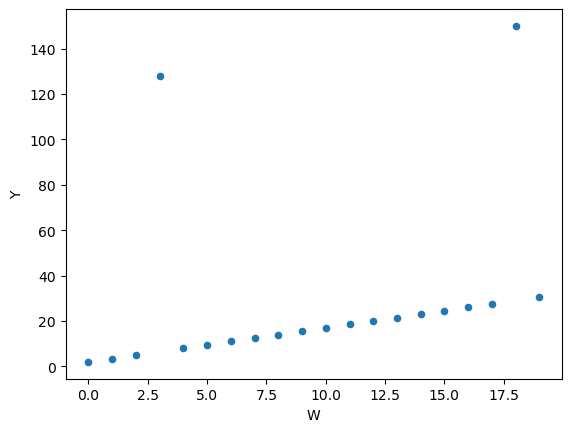

In [34]:
import matplotlib.pyplot as plot
wdf = pd.DataFrame(np.arange(20),columns = ['W'])
wdf['Y'] = wdf['W']*1.5+2
wdf.iloc[3,1] = 128
wdf.iloc[18,1] = 150
wdf.plot(kind = 'scatter',x = 'W',y = 'Y')


【例5-32】利用箱线图分析异常值。

{'whiskers': [<matplotlib.lines.Line2D at 0x25ab2a05d60>,
 'caps': [<matplotlib.lines.Line2D at 0x25ab2a17250>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ab2a05ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x25ab2a17790>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ab2a17a30>],
 'means': []}

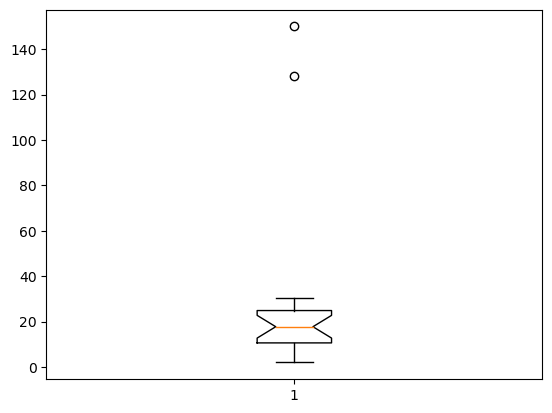

In [35]:
import matplotlib.pyplot as plt
plt.boxplot(wdf['Y'].values,notch = True)



【例5-33】利用3σ法则检测异常值。

In [36]:
def outRange(S):
    blidx = (S.mean()-3*S.std()>S)|(S.mean()+3*S.std()<S)
    idx = np.arange(S.shape[0])[blidx]
    outRange = S.iloc[idx]
    return outRange
outier = outRange(wdf['Y'])
outier


18    150.0
Name: Y, dtype: float64

【例5-34】replace替换数据值。

In [37]:
data = {'姓名':['李红','小明','马芳','国志'],'性别':['0','1','0','1'],
'籍贯':['北京','甘肃','','上海']}
df = pd.DataFrame(data)
df = df.replace('','不详')
print(df)


   姓名 性别  籍贯
0  李红  0  北京
1  小明  1  甘肃
2  马芳  0  不详
3  国志  1  上海


【例5-35】replace传入列表实现多值替换。

In [38]:
df = df.replace(['不详','甘肃'],['兰州','兰州'])
print(df)


   姓名 性别  籍贯
0  李红  0  北京
1  小明  1  兰州
2  马芳  0  兰州
3  国志  1  上海


【例5-36】 replace传入字典实现多值替换

In [39]:
df = df.replace({'1':'男','0':'女'})
print(df)


   姓名 性别  籍贯
0  李红  女  北京
1  小明  男  兰州
2  马芳  女  兰州
3  国志  男  上海


【例5-37】map方法映射数据。

In [40]:
data = {'姓名':['李红','小明','马芳','国志'],'性别':['0','1','0','1'],
'籍贯':['北京','兰州','兰州','上海']}
df = pd.DataFrame(data)
df['成绩'] = [58,86,91,78]
print(df)
def grade(x):
    if x>=90:
        return '优'
    elif 70<=x<90:
        return '良'
    elif 60<=x<70:
        return '中'
    else:
        return '差'
df['等级'] = df['成绩'].map(grade)
print("-----------------------------------")
print(df)


   姓名 性别  籍贯  成绩
0  李红  0  北京  58
1  小明  1  兰州  86
2  马芳  0  兰州  91
3  国志  1  上海  78
-----------------------------------
   姓名 性别  籍贯  成绩 等级
0  李红  0  北京  58  差
1  小明  1  兰州  86  良
2  马芳  0  兰州  91  优
3  国志  1  上海  78  良


【例5-38】数据的离差标准化。

In [41]:
def MinMaxScale(data):
    data = (data-data.min())/(data.max()-data.min())
    return data
x = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
print('原始数据为：\n',x)
x_scaled = MinMaxScale(x)
print('标准化后矩阵为:\n',x_scaled,end = '\n')


原始数据为：
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
标准化后矩阵为:
 [[0.66666667 0.         1.        ]
 [1.         0.33333333 0.33333333]
 [0.33333333 0.66666667 0.        ]]


【例5-39】数据的标准差标准化。

In [42]:
def StandardScale(data):
    data = (data-data.mean())/data.std()
    return data
x = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
print('原始数据为：\n',x)
x_scaled = StandardScale(x)
print('标准化后矩阵为:\n',x_scaled,end = '\n')


原始数据为：
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
标准化后矩阵为:
 [[ 0.52128604 -1.35534369  1.4596009 ]
 [ 1.4596009  -0.41702883 -0.41702883]
 [-0.41702883  0.52128604 -1.35534369]]


【例5-40】数据的哑变量处理。

In [43]:
df = pd.DataFrame([  
            ['green', 'M', 10.1, 'class1'],   
            ['red', 'L', 13.5, 'class2'],   
            ['blue', 'XL', 15.3, 'class1']])  
df.columns = ['color', 'size', 'prize','class label']  
print(df)
pd.get_dummies(df) 


   color size  prize class label
0  green    M   10.1      class1
1    red    L   13.5      class2
2   blue   XL   15.3      class1


,prize,color_blue,color_green,color_red,size_L,size_M,size_XL,class label_class1,class label_class2
0,10.1,False,True,False,False,True,False,True,False
1,13.5,False,False,True,True,False,False,False,True
2,15.3,True,False,False,False,False,True,True,False


【例5-41】cut方法应用。

In [44]:
np.random.seed(666)
score_list = np.random.randint(25, 100, size = 10)
print('原始数据：\n',score_list)
bins = [0, 59, 70, 80, 100]
score_cut = pd.cut(score_list, bins)
print(score_cut)
print(pd.value_counts(score_cut)) 
# 统计每个区间人数


原始数据：
 [27 70 55 87 95 98 55 61 86 76]
[(0, 59], (59, 70], (0, 59], (80, 100], (80, 100], (80, 100], (0, 59], (59, 70], (80, 100], (70, 80]]
Categories (4, interval[int64, right]): [(0, 59] < (59, 70] < (70, 80] < (80, 100]]
(80, 100]    4
(0, 59]      3
(59, 70]     2
(70, 80]     1
Name: count, dtype: int64


【例5-42】等频法离散化连续型数据。

In [45]:
def SameRateCut(data,k):
    k = 2
    w = data.quantile(np.arange(0,1+1.0/k,1.0/k))
    print(w)
    data = pd.cut(data,w)
    return data
result = SameRateCut(pd.Series(score_list),3)
print(result)
result.value_counts()


0.0    27.0
0.5    73.0
1.0    98.0
dtype: float64
0             NaN
1    (27.0, 73.0]
2    (27.0, 73.0]
3    (73.0, 98.0]
4    (73.0, 98.0]
5    (73.0, 98.0]
6    (27.0, 73.0]
7    (27.0, 73.0]
8    (73.0, 98.0]
9    (73.0, 98.0]
dtype: category
Categories (2, interval[float64, right]): [(27.0, 73.0] < (73.0, 98.0]]


(73.0, 98.0]    5
(27.0, 73.0]    4
Name: count, dtype: int64